In [83]:
%matplotlib notebook
%run functions.py
%run dataset.py

In [96]:
def qomlhrh(stri):
    y = readfile(stri)
    qomlh = numpy.sqrt(numpy.square(y[['LHX','LHY','LHZ']]).sum(axis =1))
    qomrh = numpy.sqrt(numpy.square(y[['RHX','RHY','RHZ']]).sum(axis =1))
    return{'qomlh':qomlh,'qomrh':qomrh}

In [95]:
def qompurana(stri):
    y = readfile(stri)
    qomlh = numpy.sqrt(numpy.square(y[['LHX','LHY','LHZ']]).sum(axis =1))
    qomrh = numpy.sqrt(numpy.square(y[['RHX','RHY','RHZ']]).sum(axis =1))
    return{'qomlh':numpy.mean(qomlh),'qomrh':numpy.mean(qomrh)}


In [92]:
import numpy as np

In [89]:
def displyax(stri):
    r = readfile(stri)['RHZ']   
    l = readfile(stri)['LHZ']
    e = []
    for i in range(1,len(l)):
        e.append(distance.euclidean(r[i-1],r[i])+distance.euclidean(r[i],r[i-1]))
    return(e)

In [90]:
def shaking(stri):
    hopsize = 1
    winsize = 20
    rh = pd.DataFrame.as_matrix(readfile(stri).iloc[:,1:4])
    lh = pd.DataFrame.as_matrix(readfile(stri).iloc[:,4:7])
    xr = rh[:,0]
    yr = rh[:,1]
    zr = rh[:,2]
    xl = lh[:,0]
    yl = lh[:,1]
    zl = lh[:,2]
    acccomps1 = np.array([np.diff(np.diff(xr)),np.diff(np.diff(yr)),np.diff(np.diff(zr))])
    acccomps1 = acccomps1.transpose()
    acccomps2 = np.array([np.diff(np.diff(xl)),np.diff(np.diff(yl)),np.diff(np.diff(zl))])
    acccomps2 = acccomps2.transpose()
    for j in range(1,len(rh)):
        shook = numpy.mean(acccomps1[:,j:j+20]+acccomps2[:,j:j+20])
    return shook

In [93]:
def symmetry(stri):
    rh = pd.DataFrame.as_matrix(readfile(stri).iloc[:,1:4])
    lh = pd.DataFrame.as_matrix(readfile(stri).iloc[:,4:7])
    symmetry = abs(numpy.diff(rh[:,0])+numpy.diff(lh[:,0]))+abs(numpy.diff(rh[:,2])+numpy.diff(lh[:,2]))
    return symmetry

# [a = x, b = z, c=vel, d=acc, e=jerk, f=handDist, g=QoM, h=symmetry]

In [97]:
#for each tracing, calculate qom(lh),qom(rh),select whichever is greater, and make dataframe from it
# p = numpy.zeroes(4)
from numpy import linalg as LA
p = []
for i in tracings:
    xx = qompurana(i)
    m = []
    if xx['qomlh'] > xx['qomrh']:
        x = getlhrh(i)['lh']['LHX']
        y = getlhrh(i)['lh']['LHY']
        z = getlhrh(i)['lh']['LHZ']
        n = []
        df = pd.DataFrame(getlhrh(i)['lh'])
        df = df - numpy.mean(df)
        a = numpy.array(df['LHX'])
        b = numpy.array(df['LHZ'])
        vrcomps = np.array([np.diff(x), np.diff(y), np.diff(z)])
        vrcomps = vrcomps.transpose()
        c = LA.norm(vrcomps, axis=1, ord=1)
        acccomps = np.array([np.diff(np.diff(x)),np.diff(np.diff(y)),np.diff(np.diff(z))])
        acccomps = acccomps.transpose()
        d = LA.norm(acccomps,axis =1,ord =1)
        jerkcomps = np.array([np.diff(np.diff(np.diff(x))),np.diff(np.diff(np.diff(y))),np.diff(np.diff(np.diff(z)))])
        jerkcomps = jerkcomps.transpose()
        e = LA.norm(jerkcomps,axis =1,ord =1)
        f = numpy.array(handdist(i))
        g = numpy.array(qomlhrh(i)['qomlh'])
        h = symmetry(i)
        n = [a,b,c,d,e,f,g,h]
    else:
        x = getlhrh(i)['rh']['RHX']
        y = getlhrh(i)['rh']['RHY']
        z = getlhrh(i)['rh']['RHZ']
        n = []
        df = pd.DataFrame(getlhrh(i)['rh'])
        df = df - numpy.mean(df)
        a = numpy.array(df['RHX'])
        b = numpy.array(df['RHZ'])
        vrcomps = np.array([np.diff(x), np.diff(y), np.diff(z)])
        vrcomps = vrcomps.transpose()
        c = LA.norm(vrcomps, axis=1, ord=1)
        acccomps = np.array([np.diff(np.diff(x)),np.diff(np.diff(y)),np.diff(np.diff(z))])
        acccomps = acccomps.transpose()
        d = LA.norm(acccomps,axis =1,ord =1)
        d = numpy.diff(c)
        jerkcomps = np.array([np.diff(np.diff(np.diff(x))),np.diff(np.diff(np.diff(y))),np.diff(np.diff(np.diff(z)))])
        jerkcomps = jerkcomps.transpose()
        e = LA.norm(jerkcomps,axis =1,ord =1)
        f = numpy.array(handdist(i))
        g = numpy.array(qomlhrh(i)['qomrh'])
        h = symmetry(i)
        n = [a,b,c,d,e,f,g,h]
    g = pd.DataFrame(n)
    g = numpy.array(g.T)
    p.append(g)

In [98]:
p = numpy.array(p)
p.shape

(794, 600, 8)

In [44]:
i = tracings[560]

<IPython.core.display.Javascript object>


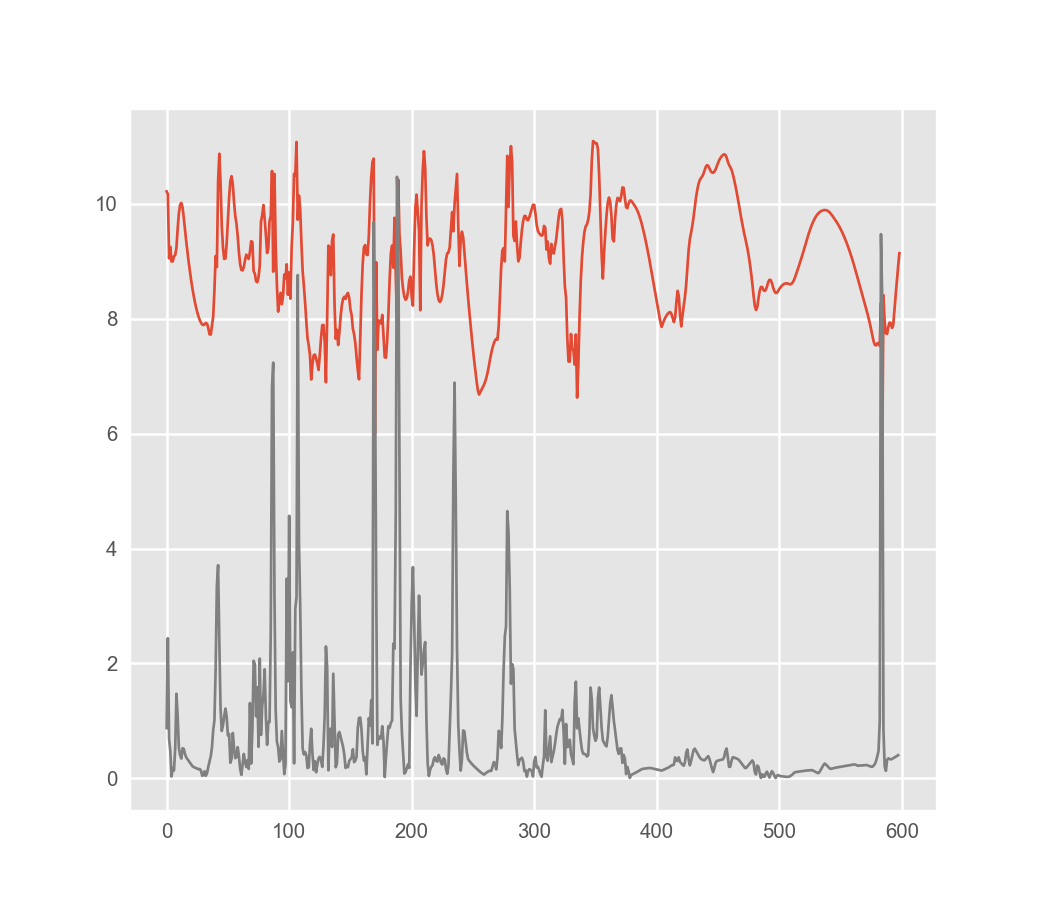

In [86]:
from numpy import linalg as LA
vrcomps = np.array([np.diff(x), np.diff(y), np.diff(z)])
vrcomps = vrcomps.transpose()
f,a = plt.subplots()
# velocity magnitude of right hand for example
vrmag = LA.norm(vrcomps, axis=1, ord=1)
acccomps = np.array([np.diff(np.diff(x)),np.diff(np.diff(y)),np.diff(np.diff(z)),])
acccomps = acccomps.transpose()
accmag = LA.norm(acccomps,axis =1,ord =1)
plt.plot(vrmag)
plt.plot(accmag, color = 'grey')

In [46]:
from numpy import linalg as LA
vrcomps = np.array([np.square(np.diff(x)), np.square(np.diff(y)), np.square(np.diff(z))])
vrcomps = vrcomps.transpose()

# velocity magnitude of right hand for example
vrmag = LA.norm(vrcomps, axis=1, ord=2)


In [47]:
partLabels = []
for i in range(len(tracings)):
    partLabels.append(int(returnDetails(tracings[i])['partID']))

In [48]:
partLabels = numpy.array(partLabels)

In [49]:
numpy.save('partLabels',partLabels, allow_pickle=True)

In [50]:
numpy.save('motiondata',p, allow_pickle = True)

In [63]:
mLabels = numpy.load('melodiesLabels.npy')

In [100]:
melodies = []
for i in range(len(tracings)):
    melodies.append(int(returnDetails(tracings[i])['melID']))

In [101]:
for i in range(len(melodies)):
    if melodies[i]>16:
        melodies[i] = melodies[i]-16

In [102]:
melodies= pd.DataFrame(melodies)

In [115]:
%matplotlib inline

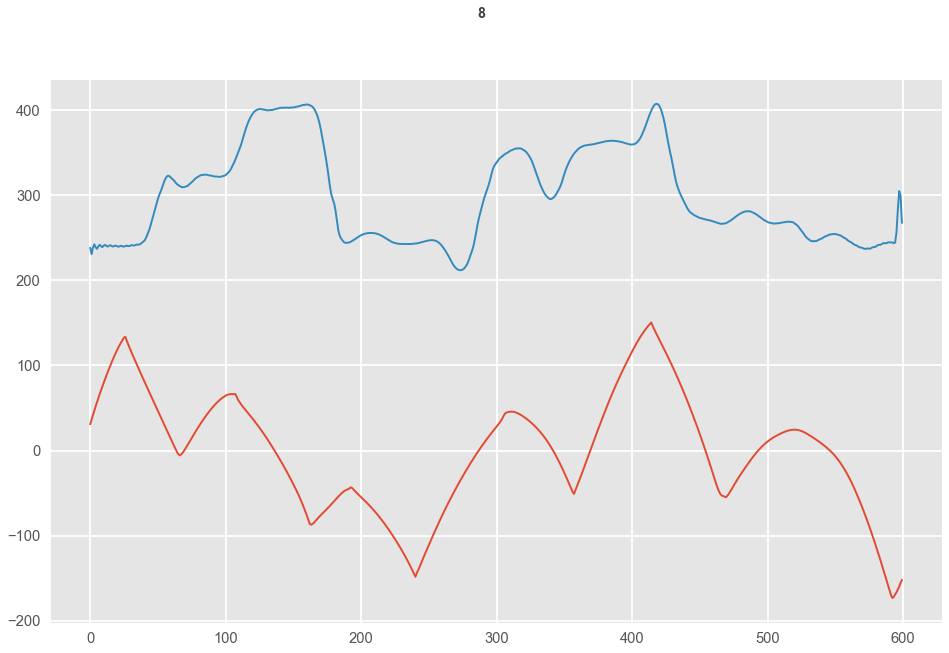

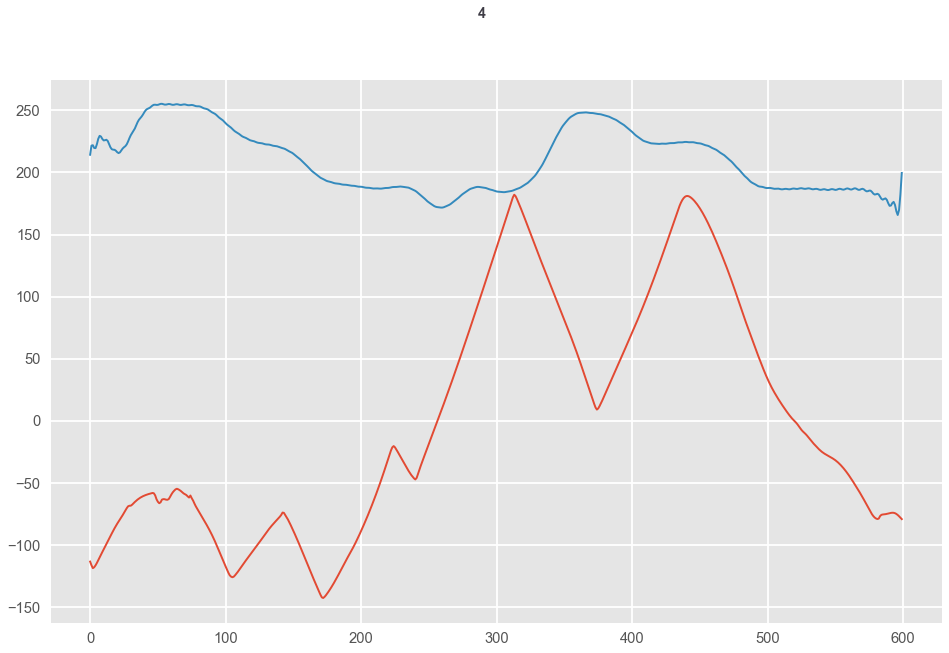

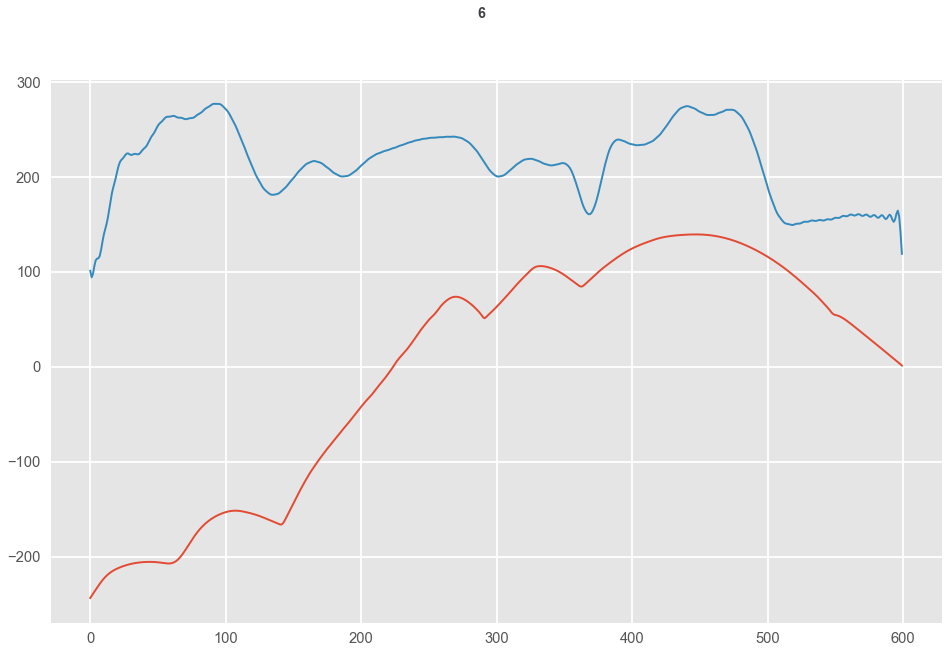

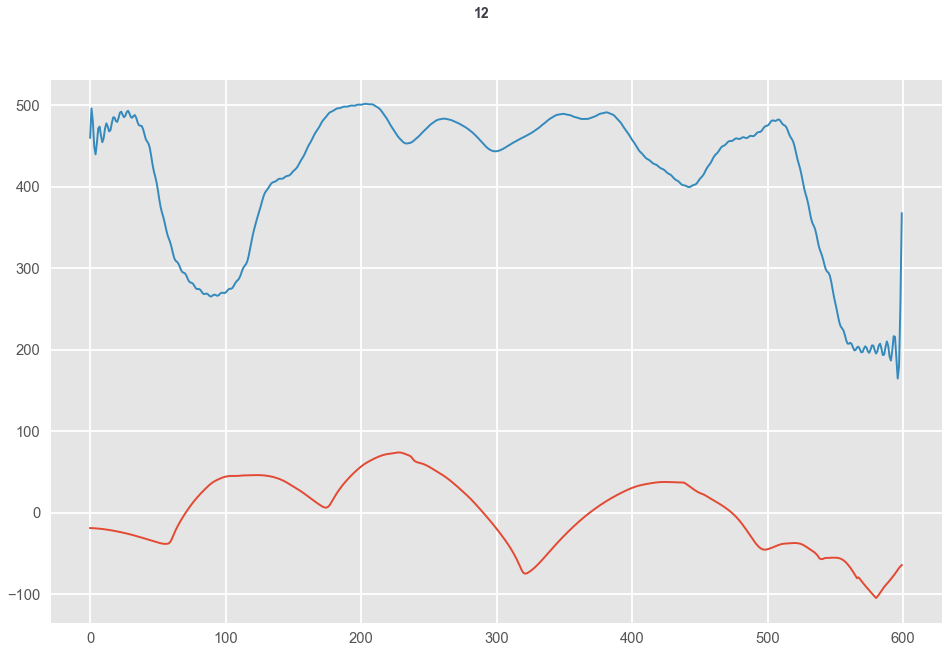

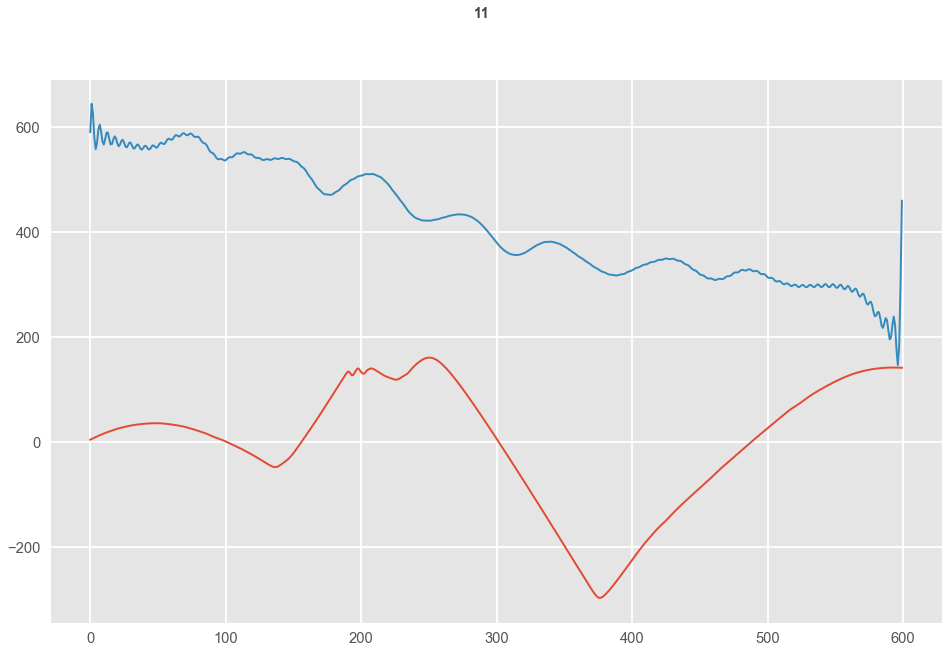

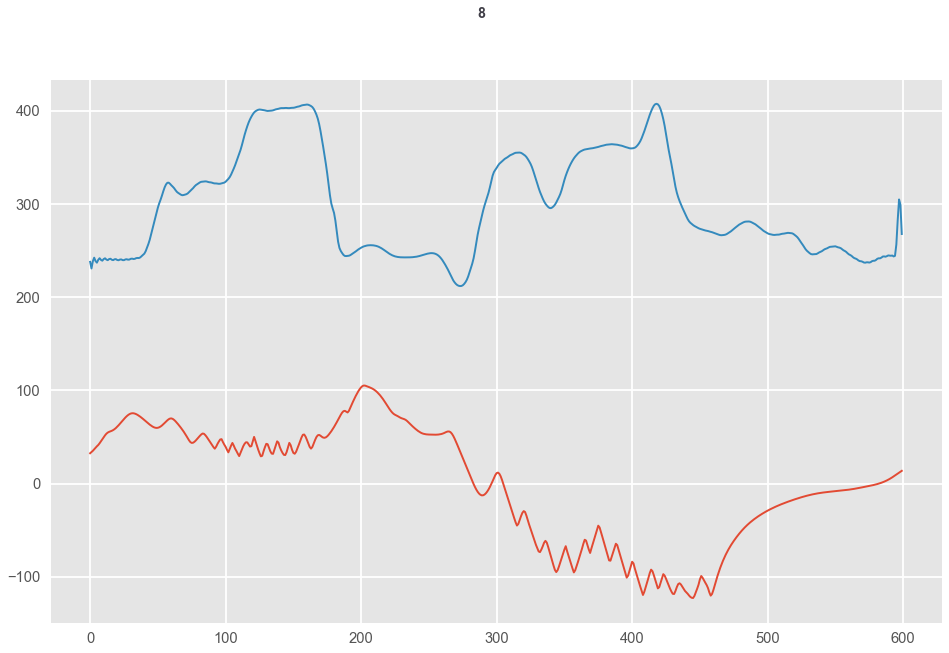

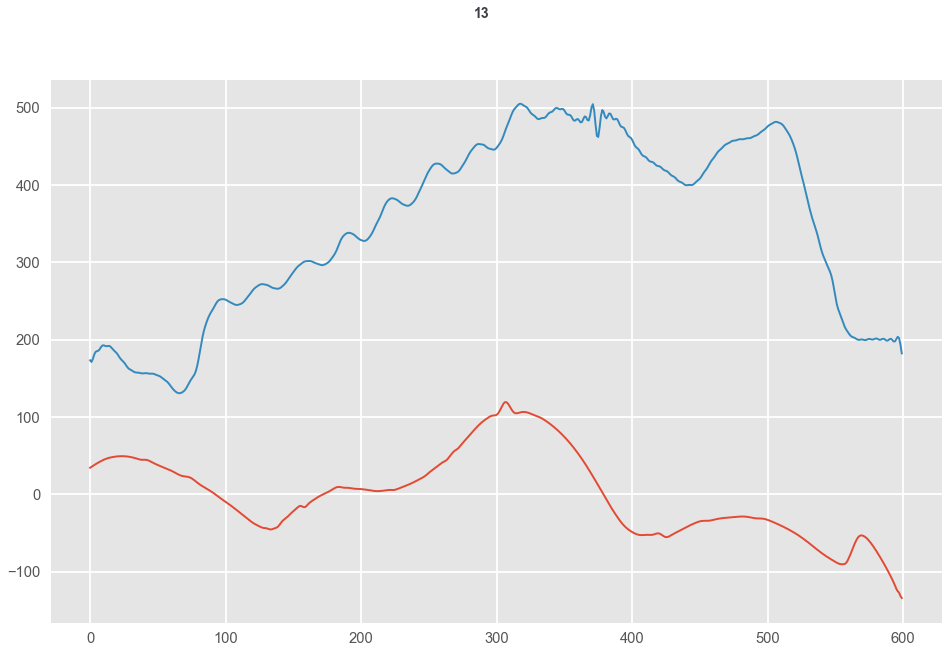

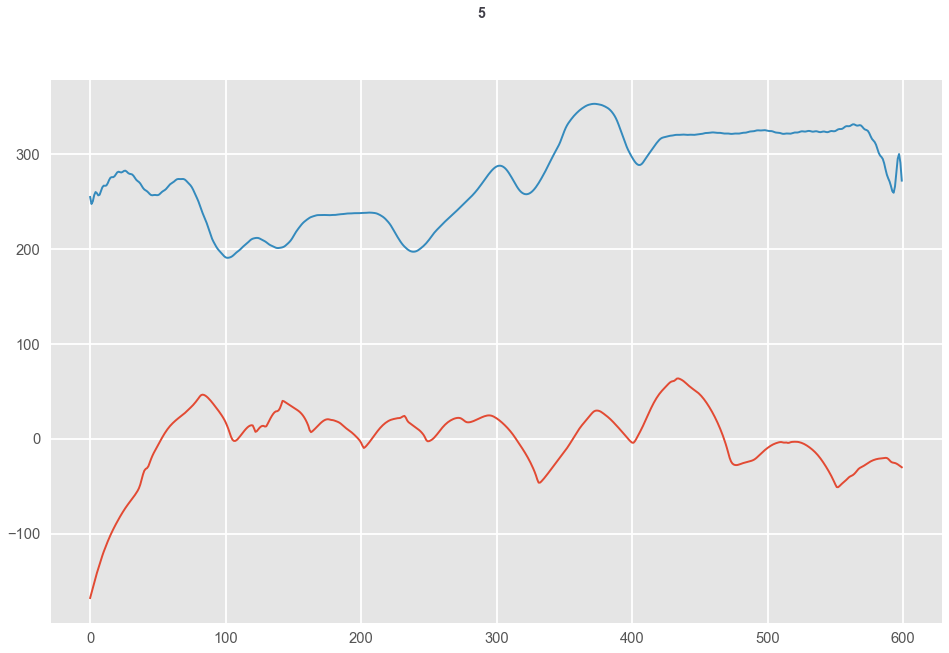

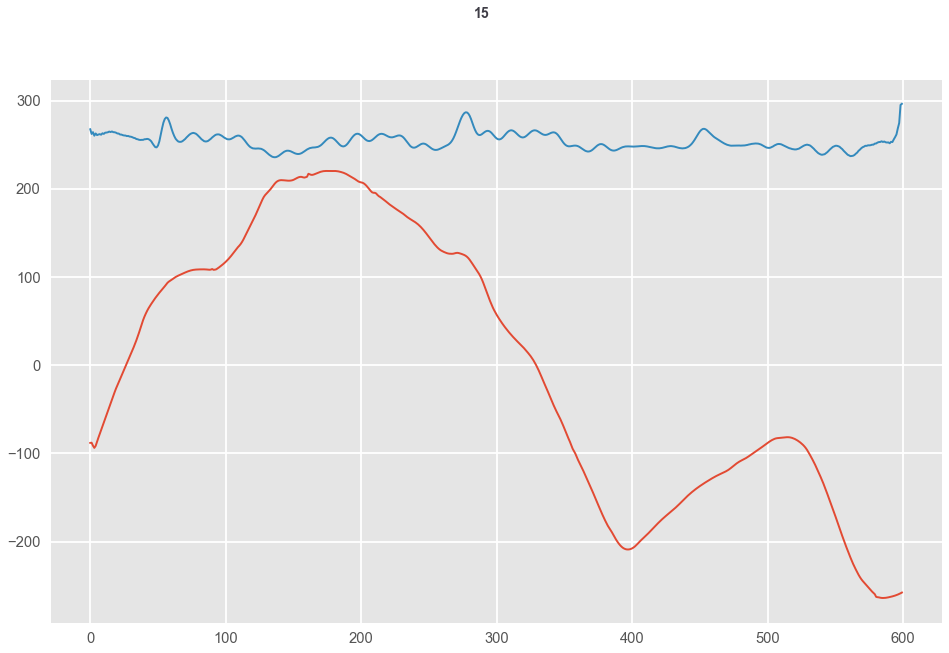

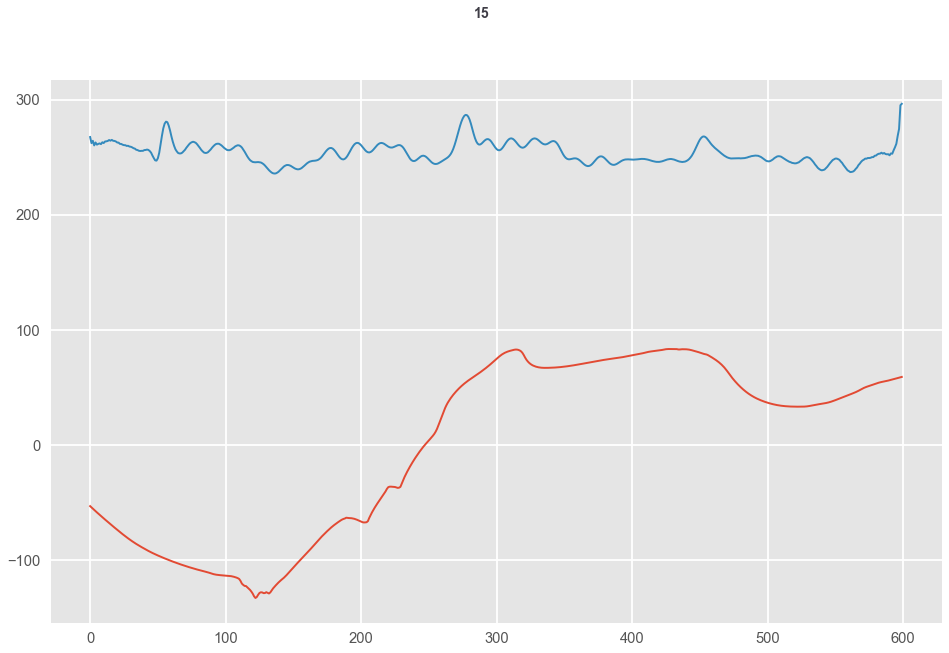

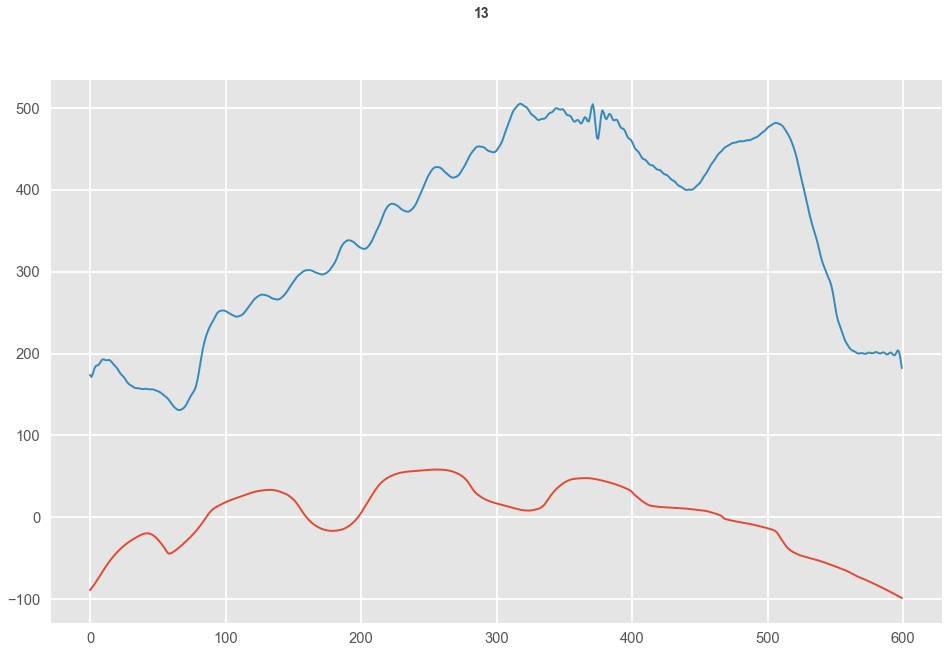

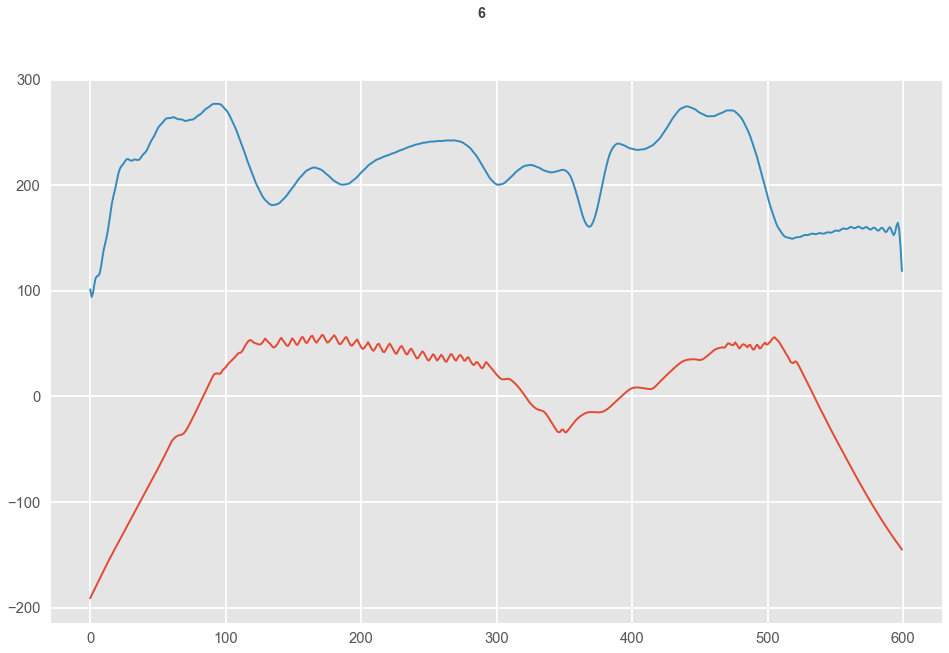

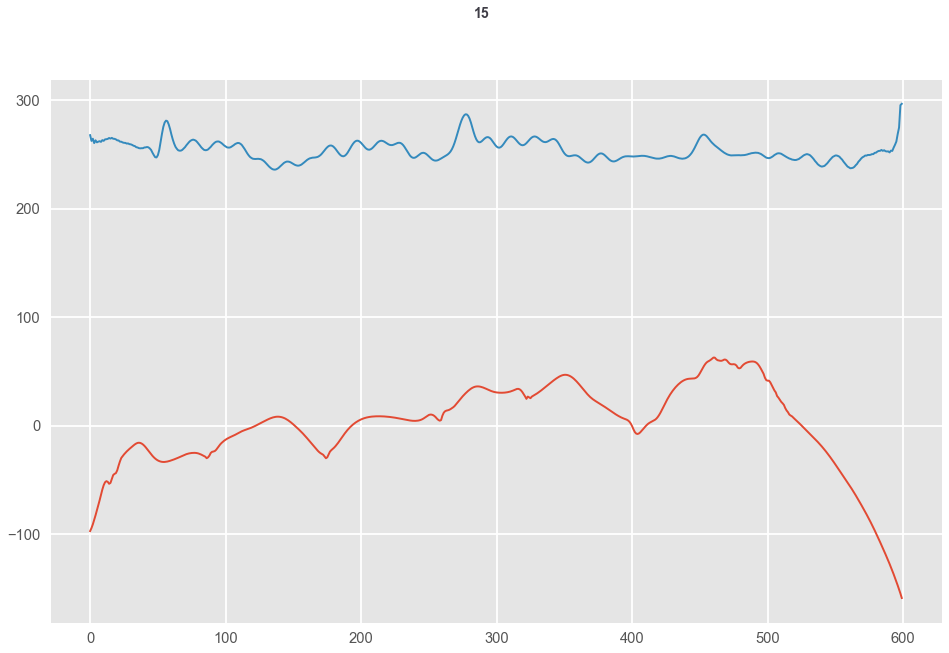

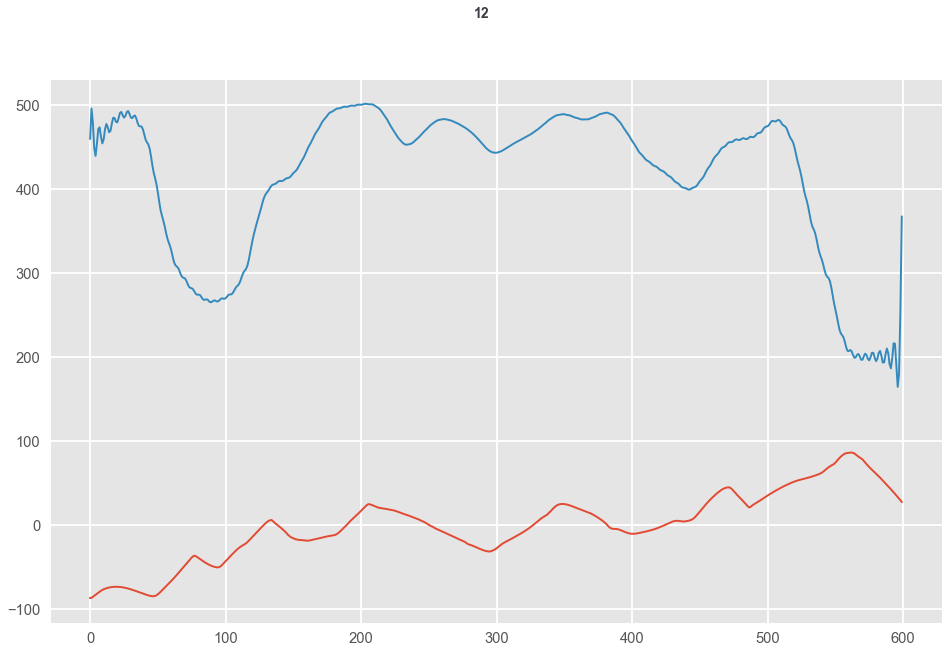

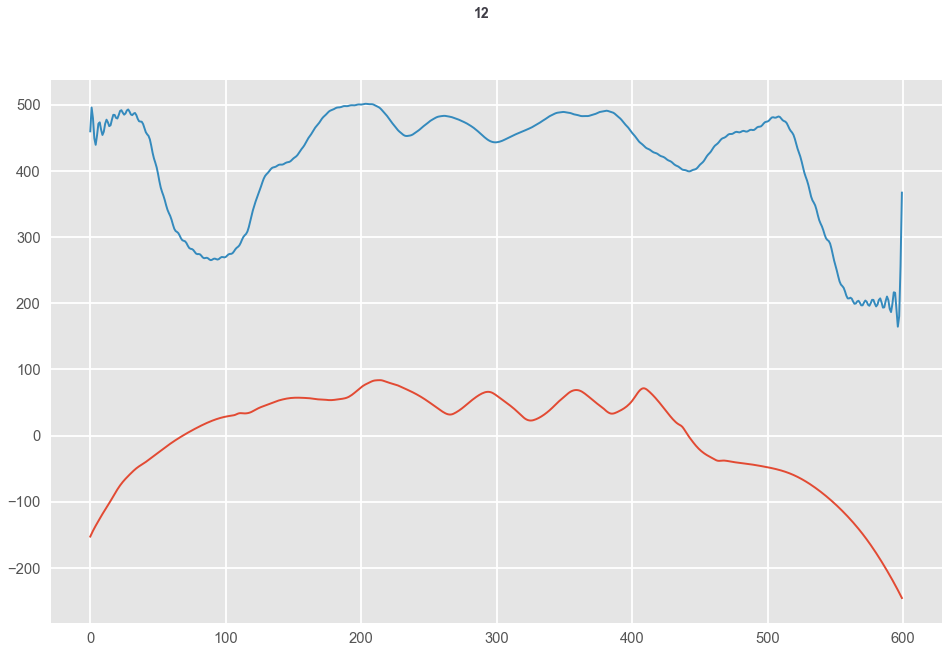

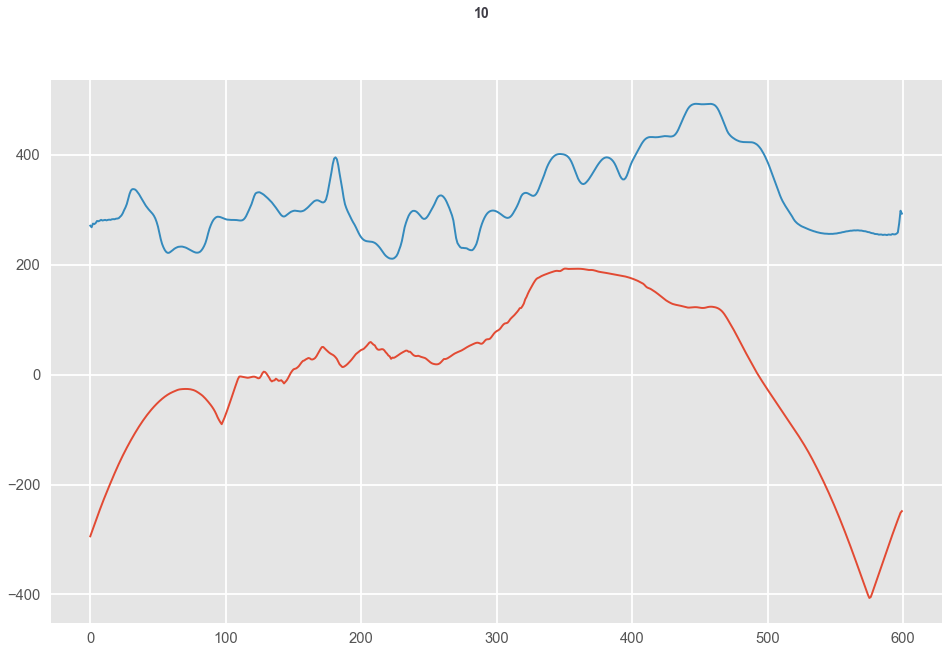

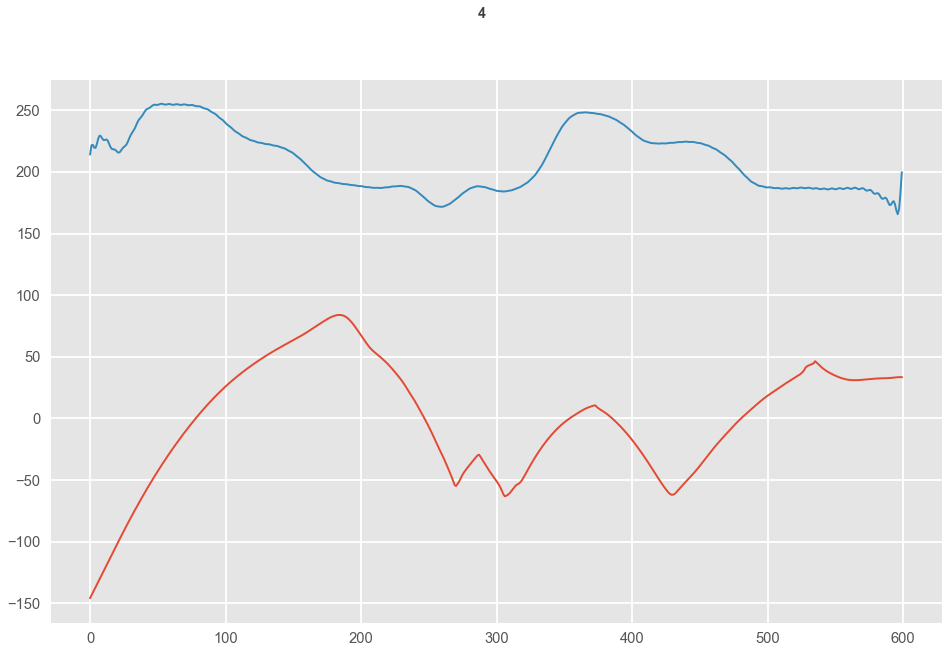

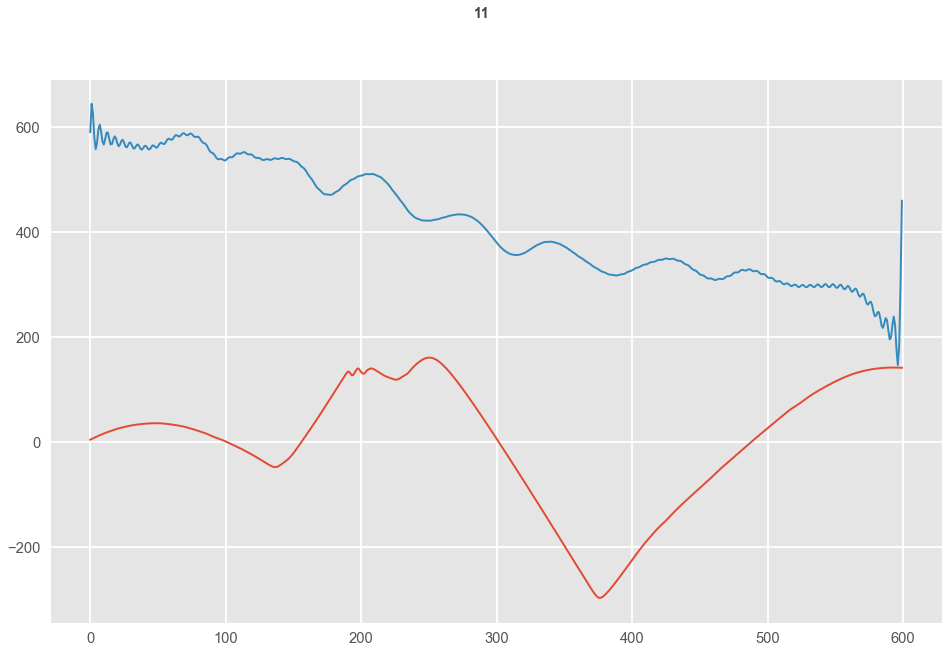

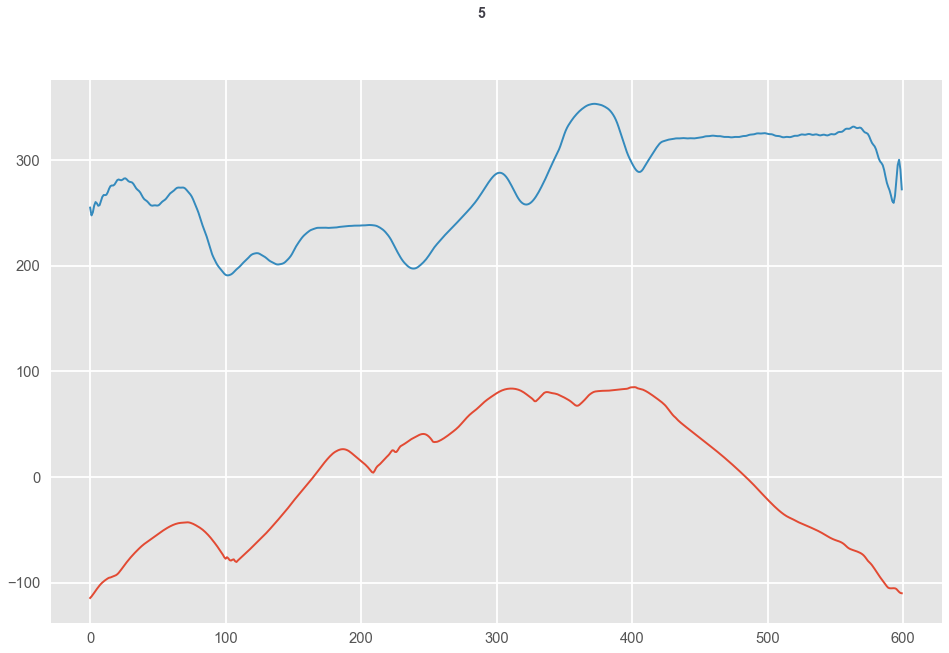

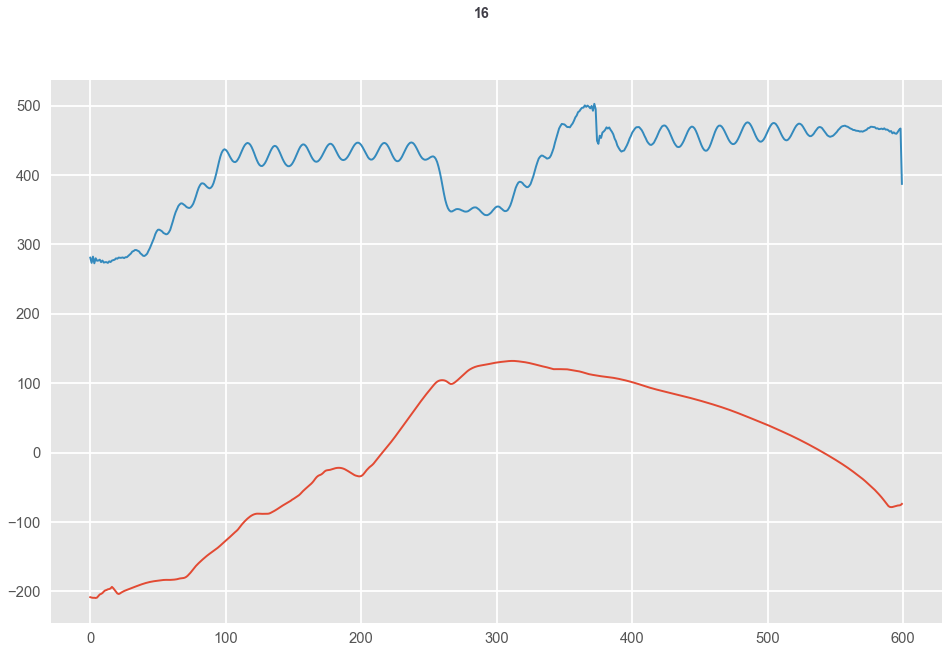

In [127]:
import random
for i in range(20):
    num = random.randint(1, 700)
    val = p[num,:,0]
    f,ax = plt.subplots(figsize = (16,10))
    ax = plt.plot(val)
    ax = plt.plot(melodi[num,:,0])
    f.suptitle(mLabels[num], fontsize=14, fontweight='bold')

In [56]:
melodies.to_csv('melodies794')

In [107]:
melodi = numpy.load('melodiesFeatures.npy')